# Qwind

This notebook shows a quick example on how to get Qwind up and running.

First, we load the core code module.

In [1]:
from qwind import wind

Next we initialise the black hole system, the parameters we can specifiy are:

In [2]:
wind.Qwind?

Init signature:
wind.Qwind(
    ['M=200000000.0', 'mdot=0.5', 'spin=0.0', 'eta=0.06', 'r_in=200', 'r_out=1600', 'r_min=6.0', 'r_max=1400', 'T=2000000.0', 'mu=1', 'modes=[]', 'rho_shielding=200000000.0', 'intsteps=1', 'nr=20', "save_dir='Results'", "radiation_mode='SimpleSED'", 'n_cpus=1'],
)
Docstring:      A class used to represent the global properties of the wind, i.e, the accretion disc and black hole properties as well as attributes shared among streamlines.
Init docstring:
Parameters
----------
r_init : float
    Radius of the first streamline to launch, in Rg units.
M : float
    Black Hole Mass in solar mass units.
mdot : float
    Accretion rate (mdot = L / Ledd)
spin : float
    Spin black hole parameter between [0,1]
eta : float
    Accretion efficiency (default is for scalar black hole).
Rmin : float
    Minimum radius of acc. disc, default is ISCO for scalar black hole.
Rmax : float
    Maximum radius of acc. disc.
T : float
    Temperature of the disc atmosphere. Wind is 

For now we just initialise it with the default values,

In [3]:
example = wind.Qwind()

r_in: 200.000000 
 r_out: 1600.000000


We can now initialise a streamline at a certain radius with some initial density and velocity by doing

In [4]:
line = example.line(r_0 = 300, rho_0 = 2e8, v_z_0 = 1e7)

And iterate its equation of motion

In [5]:
line.iterate(niter = 5000)

Failed wind! 




As we have been indicated, the line has fallen back to the disc. We can now plot different properties of the stramline.

In [6]:
import matplotlib.pyplot as plt

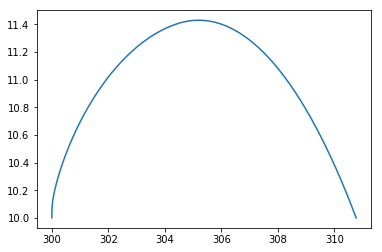

In [7]:
plt.plot(line.r_hist, line.z_hist)

The ammount of debugging information available for a streamline is:

In [8]:
for key in line.__dict__.keys():
    if 'hist' in key:
        print(key)

v_r_hist
v_esc_hist
tau_dr_hist
x_hist
d_hist
t_hist
r_hist
phi_hist
z_hist
v_phi_hist
v_z_hist
v_hist
v_T_hist
rho_hist
dvt_hist
v2_hist
dv_dr_hist
dr_e_hist
tau_uv_hist
tau_x_hist
tau_eff_hist
taumax_hist
fm_hist
xi_hist
a_hist


We can also lunch several lines at once, and use the built in embarrassingly parallel implementation.

In [9]:
example_parallel = wind.Qwind(n_cpus=3)

r_in: 200.000000 
 r_out: 1600.000000


In [10]:
example_parallel.start_lines(v_z_0=1e7, rho=2e8, niter=50000)

Starting line iteration
multiple cpus
Failed wind! 




escape velocity reached.
escape velocity reached.
Failed wind! 



out of grid 



Failed wind! 



out of grid 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 

Failed wind! 

Failed wind! 



Failed wind! 



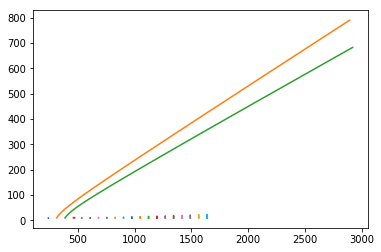

In [11]:
for line in example_parallel.lines:
    plt.plot(line.r_hist, line.z_hist)

When a streamline succesfuly launches, we can get the wind mass loss rate using

In [14]:
example_parallel.mdot_w # units of g/s

1.876864200419816e+24